In [14]:
import networkx as nx
import pickle
import math
import requests
import matplotlib.pyplot as plt

In [18]:
def make_graph():
    with open('categ.pickle','rb') as file:
        link_dict = pickle.load(file)
    
    pages = set()

    for from_page in link_dict:
        if from_page not in G:
            G.add_node(from_page)
        if len(from_page) <= 9 or from_page[:9] != 'Category:':
            pages.add(from_page)
        for to_page in link_dict[from_page]:
            if to_page not in G:
                G.add_node(to_page)
            G.add_edge(from_page, to_page)

def make_query(PARAMS):
    S = requests.Session()
    URL = "https://en.wikipedia.org/w/api.php"
    R = S.get(url=URL, params=PARAMS)
    
    return R.json()
def get_subcat(wikicat, limit):
    PARAMS = {
        "action":"query",
        "format":"json",
        "list":"categorymembers",
        "cmtitle":wikicat,
        "cmlimit":limit,
        "cmtype":"subcat",
    }
    DATA = make_query(PARAMS)
    return [cat['title'] for cat in DATA['query']['categorymembers']]

def shortest(cat):
        try:
            l = nx.shortest_path_length(G, page, cat)
        except:
            return math.inf
        else:
            return l

def get_nearest_main_topic(p):
    global page
    page = p
    nearest_main_topic = min(cats, key=shortest)
    if nx.has_path(G, page, nearest_main_topic):
        return nearest_main_topic
    else:
        return

    
    
    

G = nx.DiGraph()
make_graph()
cats = get_subcat('Category:Main_topic_classifications', limit=40)

In [16]:
get_nearest_main_topic('Party')

'Category:Events'

In [5]:
get_nearest_main_topic('Party (law)')

'Category:Law'

In [6]:
get_nearest_main_topic('Political party')

'Category:Government'

In [7]:
get_nearest_main_topic('Mandevilla')

'Category:Human behavior'

In [11]:
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 2346031\nNumber of edges: 4927674\nAverage in degree:   2.1004\nAverage out degree:   2.1004'

In [12]:
cats

['Category:Main topic articles',
 'Category:Academic disciplines',
 'Category:Business',
 'Category:Concepts',
 'Category:Crime',
 'Category:Culture',
 'Category:Economy',
 'Category:Education',
 'Category:Energy',
 'Category:Entertainment',
 'Category:Events',
 'Category:Food and drink',
 'Category:Geography',
 'Category:Government',
 'Category:Health',
 'Category:History',
 'Category:Human behavior',
 'Category:Humanities',
 'Category:Knowledge',
 'Category:Language',
 'Category:Law',
 'Category:Life',
 'Category:Mathematics',
 'Category:Military',
 'Category:Mind',
 'Category:Music',
 'Category:Nature',
 'Category:Objects',
 'Category:Organizations',
 'Category:People',
 'Category:Philosophy',
 'Category:Politics',
 'Category:Religion',
 'Category:Science',
 'Category:Society',
 'Category:Sports',
 'Category:Technology',
 'Category:Universe',
 'Category:World']

In [31]:
def draw_cat_path(p):
    n_mt=get_nearest_main_topic(p)
    paths = nx.shortest_path(G, source= p, target=n_mt)
    print(nx.shortest_path(G, source= p, target=n_mt))
    G_sp = nx.DiGraph()
    for path in paths:
        nx.add_path(G_sp, paths)
    nx.draw(G_sp)
    plt.show()    

['Political party', 'Category:Elections', 'Category:Government']


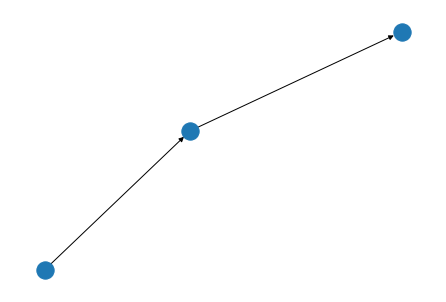

In [33]:
draw_cat_path('Political party')